In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
import sc_toolbox
import pertpy 

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
%%R
library(edgeR)

Loading required package: limma


# Running on XX cell types

In [3]:
adata_pb = sc.read('./pb_adata_LPC_Mg.h5ad')
adata_pb

AnnData object with n_obs × n_vars = 49 × 17747
    obs: 'publication', 'label', 'cell_type', 'replicate_cat', 'sample', 'sample_rep', 'batch', 'lib_size', 'log_lib_size', 'replicate'
    uns: 'cell_type_colors', 'label_colors', 'log1p', 'pca', 'publication_colors', 'replicate_cat_colors', 'sample_colors', 'sample_rep_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [4]:
# Extract the data as a pandas DataFrame
df = adata_pb.obs[['cell_type', 'label']]

# Create a summary table
summary_table = df.groupby(['cell_type', 'label']).size().unstack(fill_value=0)
summary_table

label,ctrl,stim
cell_type,,
BAMs,0,9
Mg_A,4,7
Mg_B,3,8
Mg_trt,3,9
cycl,0,6


In [5]:
adata_pb.obs

,publication,label,cell_type,replicate_cat,sample,sample_rep,batch,lib_size,log_lib_size,replicate
donor_ctrl_1_0-0-0-0-0,(this study),ctrl,Mg_A,1,ctrl_1,LPC_Saline_2,0,114835,11.651252,1
donor_ctrl_2_0-0-0-0-0,(this study),ctrl,Mg_A,2,ctrl_2,LPC_Saline_1,0,269101,12.502842,2
donor_ctrl_4_0-0-0-0-0,Pandey et al. 2022,ctrl,Mg_A,4,ctrl_4,LPC_ctrl_2,0,443698,13.002899,4
donor_ctrl_5_0-0-0-0-0,Pandey et al. 2022,ctrl,Mg_A,5,ctrl_5,LPC_ctrl_1,0,1883265,14.448518,5
donor_stim_1_0-0-0-0-0,(this study),stim,Mg_A,1,stim_1,LPC_7d_2,0,366936,12.812943,1
donor_stim_11_0-0-0-0-0,Pandey et al. 2022,stim,Mg_A,11,stim_11,LPC_5d_4,0,803812,13.597121,11
donor_stim_2_0-0-0-0-0,(this study),stim,Mg_A,2,stim_2,LPC_7d_1,0,1010007,13.825468,2
donor_stim_3_0-0-0-0-0,Pandey et al. 2022,stim,Mg_A,3,stim_3,LPC_5d_1,0,827718,13.626428,3
donor_stim_5_0-0-0-0-0,Pandey et al. 2022,stim,Mg_A,5,stim_5,LPC_28d_3,0,255394,12.450563,5
donor_stim_6_0-0-0-0-0,Pandey et al. 2022,stim,Mg_A,6,stim_6,LPC_28d_1,0,545836,13.210074,6


In [6]:
adata_sub= adata_pb[np.in1d(adata_pb.obs['cell_type'], 
                           ['Mg_A', 'Mg_trt'])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (23, 17747)


In [7]:
pub_map = {
    '(this study)': 'Adams',
    'Pandey et al. 2022': 'Pandey'
}

# Update the 'treatment_meta' column based on the mapping
adata_sub.obs['batch'] = adata_sub.obs['publication'].map(pub_map)

In [8]:
# Concatenate 'individual_lesion_condition' and 'replicate' to create 'sample'
adata_sub.obs['cell_type_sample'] = adata_sub.obs['cell_type'].astype(str) + '_' + adata_sub.obs['sample_rep'].astype(str)

In [9]:
adata_sub.obs[:5]

,publication,label,cell_type,replicate_cat,sample,sample_rep,batch,lib_size,log_lib_size,replicate,cell_type_sample
donor_ctrl_1_0-0-0-0-0,(this study),ctrl,Mg_A,1,ctrl_1,LPC_Saline_2,Adams,114835,11.651252,1,Mg_A_LPC_Saline_2
donor_ctrl_2_0-0-0-0-0,(this study),ctrl,Mg_A,2,ctrl_2,LPC_Saline_1,Adams,269101,12.502842,2,Mg_A_LPC_Saline_1
donor_ctrl_4_0-0-0-0-0,Pandey et al. 2022,ctrl,Mg_A,4,ctrl_4,LPC_ctrl_2,Pandey,443698,13.002899,4,Mg_A_LPC_ctrl_2
donor_ctrl_5_0-0-0-0-0,Pandey et al. 2022,ctrl,Mg_A,5,ctrl_5,LPC_ctrl_1,Pandey,1883265,14.448518,5,Mg_A_LPC_ctrl_1
donor_stim_1_0-0-0-0-0,(this study),stim,Mg_A,1,stim_1,LPC_7d_2,Adams,366936,12.812943,1,Mg_A_LPC_7d_2


# Subset for demyelination and remyelination MOL2 data

In [10]:
# Unique values in the 'condition' column
unique_conditions = adata_sub.obs['cell_type_sample'].unique()
for condition in unique_conditions:
    print(condition)

Mg_A_LPC_Saline_2
Mg_A_LPC_Saline_1
Mg_A_LPC_ctrl_2
Mg_A_LPC_ctrl_1
Mg_A_LPC_7d_2
Mg_A_LPC_5d_4
Mg_A_LPC_7d_1
Mg_A_LPC_5d_1
Mg_A_LPC_28d_3
Mg_A_LPC_28d_1
Mg_A_LPC_28d_2
Mg_trt_LPC_Saline_2
Mg_trt_LPC_Saline_1
Mg_trt_LPC_ctrl_1
Mg_trt_LPC_7d_2
Mg_trt_LPC_5d_4
Mg_trt_LPC_7d_1
Mg_trt_LPC_5d_1
Mg_trt_LPC_5d_3
Mg_trt_LPC_28d_3
Mg_trt_LPC_28d_1
Mg_trt_LPC_5d_2
Mg_trt_LPC_28d_2


In [11]:
adata_sub= adata_sub[np.in1d(adata_sub.obs['cell_type_sample'], 
                           [
                            'Mg_A_LPC_ctrl_2',
                            'Mg_A_LPC_ctrl_1',
                            'Mg_trt_LPC_28d_3',
                            'Mg_trt_LPC_28d_2',
                            'Mg_trt_LPC_28d_1',              
                           ])].copy()

print("Dimensions of adata_sub:", adata_sub.shape)

Dimensions of adata_sub: (5, 17747)


In [12]:
# Check if the 'sample_rep' column exists
if 'sample_rep' in adata_sub.obs.columns:
    # Set the 'sample_rep' column as the index
    adata_sub.obs.set_index('sample_rep', inplace=True)
else:
    print("The column 'sample_rep' does not exist in adata_sub.obs.")

adata_sub.obs.index.name = None

In [13]:
adata_sub.obs

,publication,label,cell_type,replicate_cat,sample,batch,lib_size,log_lib_size,replicate,cell_type_sample
LPC_ctrl_2,Pandey et al. 2022,ctrl,Mg_A,4,ctrl_4,Pandey,443698,13.002899,4,Mg_A_LPC_ctrl_2
LPC_ctrl_1,Pandey et al. 2022,ctrl,Mg_A,5,ctrl_5,Pandey,1883265,14.448518,5,Mg_A_LPC_ctrl_1
LPC_28d_3,Pandey et al. 2022,stim,Mg_trt,5,stim_5,Pandey,8476868,15.952852,5,Mg_trt_LPC_28d_3
LPC_28d_1,Pandey et al. 2022,stim,Mg_trt,6,stim_6,Pandey,3457085,15.055936,6,Mg_trt_LPC_28d_1
LPC_28d_2,Pandey et al. 2022,stim,Mg_trt,8,stim_8,Pandey,12785815,16.363847,8,Mg_trt_LPC_28d_2


# Rename the MOL clusters for NEW letter based nomenclature

In [14]:
#Check the counts data
print(adata_sub.X[:5, :5])

[[  0  11   2   2  16]
 [  0  21   3  12  42]
 [  3  79   8  77  83]
 [  2  73   7  38  41]
 [  1 129   8 130 136]]


# Start R code: QC of log transformation

In [15]:
%%R -i adata_sub

# Concatenate label and cell type for group factor
group <- colData(adata_sub)$label #ctrl or stim
replicate <- colData(adata_sub)$replicate #replicate number
batch <- colData(adata_sub)$batch

treatments <- data.frame("Group"=group, "Reps"=replicate, "Batch"= batch)
print(treatments)

           Group Reps  Batch
LPC_ctrl_2  ctrl    4 Pandey
LPC_ctrl_1  ctrl    5 Pandey
LPC_28d_3   stim    5 Pandey
LPC_28d_1   stim    6 Pandey
LPC_28d_2   stim    8 Pandey


In [16]:
%%R

#Create a DGElist object using the anndata counts in 'X'
x <- DGEList(assay(adata_sub, "X"), group=colData(adata_sub)$label)

samplenames <- colnames(x$counts)

print("Dimensions before subsetting:")
print(dim(x))

# Check counts per group before filtering
print(table(x$samples$group))

[1] "Dimensions before subsetting:"
[1] 17747     5

ctrl stim 
   2    3 


In [17]:
%%R

cd <- x$samples$group
print(cd)

# Adjust for batch-- ie publication in the model matrix
design <- model.matrix(~0 + cd)
print(design)

[1] ctrl ctrl stim stim stim
Levels: ctrl stim
  cdctrl cdstim
1      1      0
2      1      0
3      0      1
4      0      1
5      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$cd
[1] "contr.treatment"



In [18]:
%%R

# More strict removal of genes, tried group, pub and batch
keep.expr <- filterByExpr(x, design)
x2 <- x[keep.expr,, keep.lib.sizes=FALSE]
dim(x2)

[1] 10358     5


In [19]:
%%R

## OLD DON"T USE THIS

keep.exprs <- filterByExpr(x, group=batch)
b <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(b)

[1] 7882    5


In [20]:
%%R
#X is before trimming, Y is after trimming
L <- mean(x2$samples$lib.size) * 1e-6
M <- median(x2$samples$lib.size) * 1e-6
c(L, M)

[1] 5.391729 3.444966


In [21]:
%%R
## Calc norm factors before to normalize library sizes, then cpm divides counts by lib sizes
#X is before trimming, Y is after trimming, X2 is also trimmed but differently
x2 <- calcNormFactors(x2, method = "TMM")
x2$samples$norm.factors

[1] 1.2280163 1.1556415 0.8829016 0.8917881 0.8949499


In [22]:
%%R
#X2 is the norm lib sizes and trimmed
cpm <- edgeR::cpm(x2, log=FALSE, prior.counts=3)
lcpm <- edgeR::cpm(x2, log=TRUE, prior.count=3)

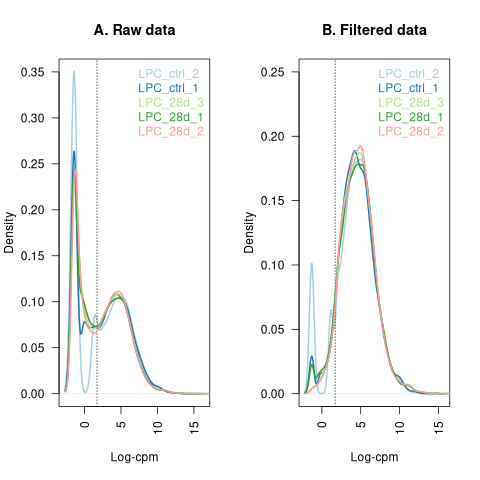

In [23]:
%%R
lcpm.cutoff <- log2(10/M + 2/L)
library(RColorBrewer)
nsamples <- ncol(x2)
col <- brewer.pal(nsamples, "Paired")

par(mfrow=c(1,2))

lcpm <- edgeR::cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.35), las=2, main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

lcpm <- edgeR::cpm(x2, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.25), las=2, main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col=col, bty="n")

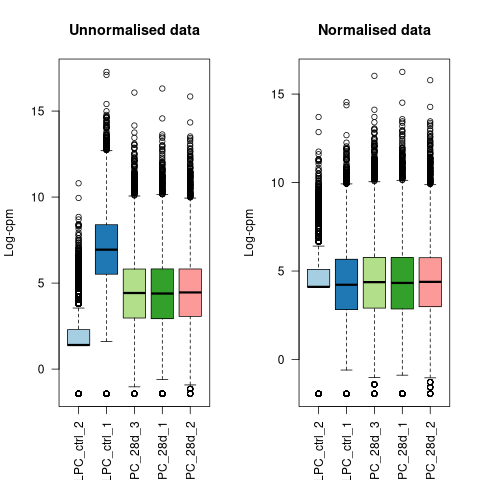

In [24]:
%%R
y2 <- x2
y2$samples$norm.factors <- 1
y2$counts[,1] <- ceiling(y2$counts[,1]*0.05)
y2$counts[,2] <- y2$counts[,2]*5

par(mfrow=c(1,2))
lcpm <- edgeR::cpm(y2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="Unnormalised data", ylab="Log-cpm")

y3 <- calcNormFactors(y2)
y3$samples$norm.factors

lcpm <- edgeR::cpm(y3, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="Normalised data", ylab="Log-cpm")

# Show how log transf + batch removal affects the separation of samples:

In [25]:
%%R
cd <- x2$samples$group
print(cd)

[1] ctrl ctrl stim stim stim
Levels: ctrl stim


In [26]:
%%R
#Make new count matrix with log counts and DGE data from X2 (trimmed, normfactors)
x3 <- x2
x3$counts <- lcpm

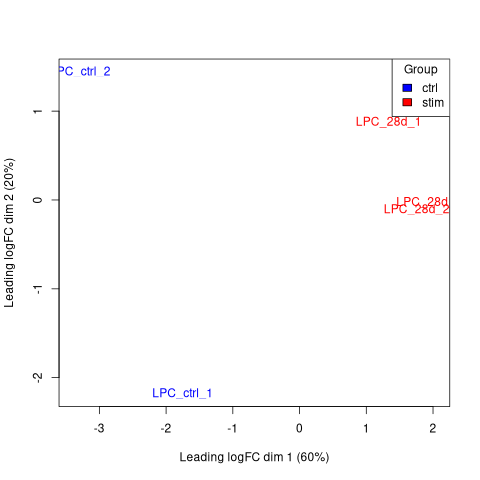

In [27]:
%%R
# Assuming 'group' is stored in y$samples dataframe
group <- x2$samples$group

# Generate a numeric vector from group factors (if not already factor, convert it)
group_factor <- as.factor(group)
group_colors <- as.numeric(group_factor)  # This converts factors to unique integers

# Define a set of colors corresponding to the factors
# Example: If you have two groups, you could define two colors
colors <- c("blue", "red")  # Adjust the number and colors based on your actual groups

# Use these colors in your plotMDS
plotMDS(x2, col = colors[group_colors])

# Adding a legend for clarity
legend("topright", legend=levels(group_factor), fill=colors, title="Group")

In [28]:
%%R
# Adjust for batch-- ie publication in the model matrix
design <- model.matrix(~0 + cd)
design

  cdctrl cdstim
1      1      0
2      1      0
3      0      1
4      0      1
5      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$cd
[1] "contr.treatment"



In [29]:
%%R
contr.matrix <- makeContrasts(cdstim - cdctrl, levels = colnames(design))
contr.matrix

        Contrasts
Levels   cdstim - cdctrl
  cdctrl              -1
  cdstim               1


In [30]:
%%R
# Convert to CPM and log2 transformation. 
logCPM <- edgeR::cpm(x2, log=TRUE, prior.count=3)

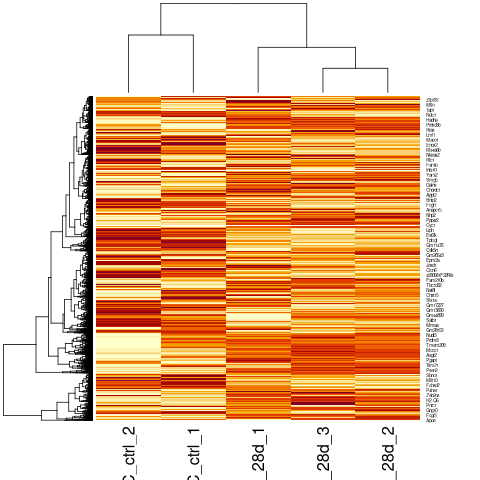

In [31]:
%%R
heatmap(logCPM)

# Lets try with voom:

In [32]:
%%R
# Adjust for batch-- ie publication in the model matrix
design <- model.matrix(~0 + cd)
design

  cdctrl cdstim
1      1      0
2      1      0
3      0      1
4      0      1
5      0      1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$cd
[1] "contr.treatment"



In [33]:
%%R
contr.matrix <- makeContrasts(cdstim - cdctrl, levels = colnames(design))
contr.matrix

        Contrasts
Levels   cdstim - cdctrl
  cdctrl              -1
  cdstim               1


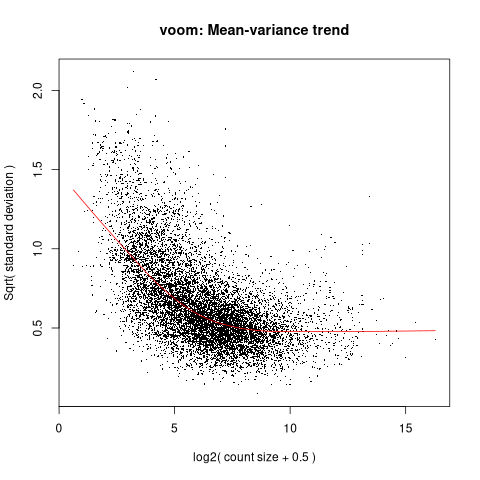

In [34]:
%%R
y <- voom(x2$counts, design, plot=TRUE)

In [35]:
%%R
fit <- lmFit(y, design)
head(coef(fit))

                cdctrl   cdstim
0610009B22Rik 3.741715 3.507165
0610009L18Rik 2.686614 3.319866
0610010F05Rik 4.643376 3.408546
0610010K14Rik 5.896699 5.778226
0610012G03Rik 5.179548 6.012658
0610030E20Rik 5.066589 4.998630


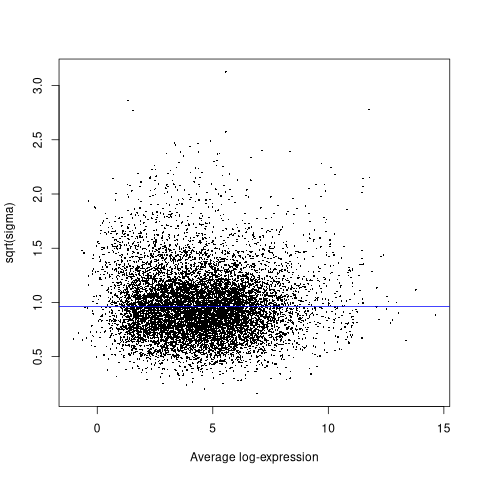

In [36]:
%%R
contr <- makeContrasts(cdstim - cdctrl, levels = colnames(coef(fit)))
tmp <- contrasts.fit(fit, contr)
tmp2 <- eBayes(tmp)

plotSA(tmp2, xlab = "Average log-expression", ylab = "sqrt(sigma)", zero.weights = FALSE,
       pch = 16, cex = 0.3, col = c("black","red"))

In [37]:
%%R
# Retrieve the top results without sorting by p-value directly
tt <- topTable(tmp2, sort.by = "P", n = Inf)
head(tt, 10)

                  logFC   AveExpr         t      P.Value    adj.P.Val         B
Apoe           7.630488 13.025590  39.18527 3.794657e-10 3.930506e-06 12.265403
Lyz2           4.160347 10.634414  20.13875 6.103941e-08 3.161231e-04  8.902843
Slc24a3       -2.965852  5.993408 -16.62946 2.589620e-07 6.502457e-04  7.606947
8030442B05Rik -3.340437  5.245436 -16.62371 2.596367e-07 6.502457e-04  7.509166
Cd63           3.076614  9.397423  15.87584 3.668236e-07 6.502457e-04  7.318733
Plxna4        -2.874007  6.425026 -15.77221 3.852860e-07 6.502457e-04  7.282881
Sox4          -3.393627  5.665082 -15.49779 4.394401e-07 6.502457e-04  7.115661
Bank1         -7.022648  2.651972 -14.93209 5.803816e-07 6.891530e-04  4.827641
Crybb1        -3.713325  6.247106 -14.53135 7.111035e-07 6.891530e-04  6.716243
Fhit          -2.410448  6.627799 -14.48191 7.294151e-07 6.891530e-04  6.697942


In [38]:
%%R
length(which(tt$adj.P.Val < 0.05))

[1] 2595


In [39]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
significant_genes <- tt[tt$adj.P.Val < 0.05 & abs(tt$logFC) > 0.7, ]
num_significant_genes <- nrow(significant_genes)

# Print the number of significant genes
print(num_significant_genes)

[1] 2521


In [40]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
significant_genes <- tt[tt$adj.P.Val < 0.05 & abs(tt$logFC) > 1, ]
num_significant_genes <- nrow(significant_genes)

# Print the number of significant genes
print(num_significant_genes)

[1] 2016


In [41]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_up <- tt[tt$adj.P.Val < 0.05 & tt$logFC > 1, ]
num_genes_up <- nrow(genes_up)

# Print the number of significant genes
print(num_genes_up)

genes_up_sorted <- genes_up[order(genes_up$logFC, decreasing = TRUE), ]

# View the head of the significant genes data frame
head(genes_up_sorted)

[1] 409
           logFC  AveExpr        t      P.Value   adj.P.Val           B
Spp1   10.677192 5.542753 7.025782 1.316156e-04 0.004505776 -0.27500687
Fabp5   9.894970 5.073123 7.396221 9.275874e-05 0.003980845 -0.14232317
Lgals3  9.514266 4.844643 6.743755 1.734359e-04 0.005147420 -0.38494558
Apoc1   8.587449 4.288798 7.549879 8.054820e-05 0.003743605 -0.09095227
Olr1    8.420120 4.188736 6.956454 1.407421e-04 0.004642698 -0.30123472
Igf1    8.267079 4.096482 7.199667 1.114887e-04 0.004240770 -0.21110333


In [42]:
%%R
if ('Apoe' %in% rownames(genes_up_sorted)) {
    print("Gene is in the index of genes_up_sorted")
} else {
    print("Gene is not in the index of genes_up_sorted")
}

[1] "Gene is in the index of genes_up_sorted"


In [43]:
%%R
# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_down <- tt[tt$adj.P.Val < 0.05 & tt$logFC < -1, ]
num_genes_down <- nrow(genes_down)

# Print the number of significant genes
print(num_genes_down)

genes_down_sorted <- genes_down[order(genes_down$logFC, decreasing = FALSE), ]

# View the head of the significant genes data frame
head(genes_down_sorted)

[1] 1607
            logFC     AveExpr          t      P.Value   adj.P.Val          B
Nhs     -9.110370 -0.17166623 -10.374765 8.496591e-06 0.001600140 1.31235070
Ctnnd2  -8.058808 -0.64120734  -8.974331 2.404481e-05 0.002724146 0.83579669
Bank1   -7.022648  2.65197226 -14.932094 5.803816e-07 0.000689153 4.82764094
Adcy8   -6.963538 -0.08869865  -7.986832 5.457421e-05 0.003175729 0.55929853
Lypd6   -6.952842 -1.02771062  -7.304738 1.010007e-04 0.004102609 0.09291637
Gm31243 -6.878729  0.66451925  -7.080315 1.248986e-04 0.004370608 0.56202588


# If output --> change name!

In [ ]:
%%R
# Add row names as a new column
tt$gene <- rownames(tt)

# Optionally reorder or select columns
tt <- tt[, c("gene", names(tt)[1:6])]

# Write to CSV file
write.table(tt, file = "./files/LPC_remyel_Mg_A_v_trt_voom_NEW.csv", 
            row.names = FALSE, sep = ",", quote = FALSE)

# Voom wqw

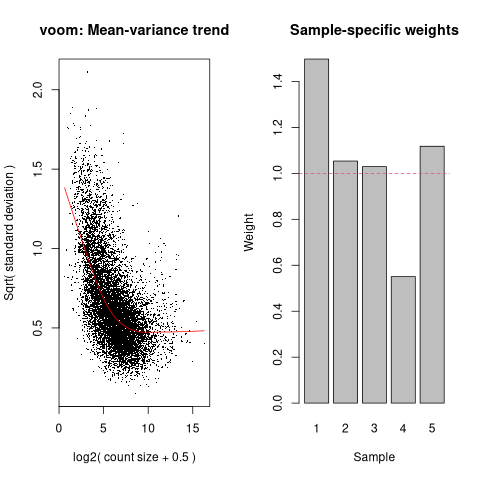

In [44]:
%%R

y_vqw_full <- voomWithQualityWeights(x2$counts, design, plot=TRUE)

In [45]:
%%R

fit <- lmFit(y_vqw_full, design)

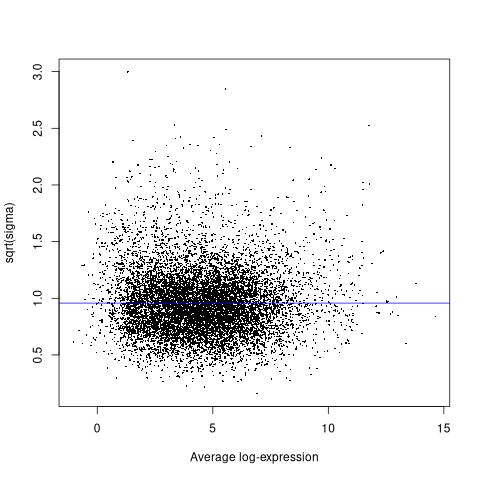

In [46]:
%%R

tmp <- contrasts.fit(fit, contr)
tmp2 <- eBayes(tmp)
tt_full <- topTable(tmp2, sort.by = "P", n = Inf)

plotSA(tmp2, xlab = "Average log-expression", ylab = "sqrt(sigma)", zero.weights = FALSE,
       pch = 16, cex = 0.3, col = c("black","red"))

In [47]:
%%R

# Retrieve the top results without sorting by p-value directly
tt <- topTable(tmp2, sort.by = "P", n = Inf)
head(tt, 10)

                  logFC   AveExpr         t      P.Value    adj.P.Val         B
Apoe           7.579554 13.025590  42.68915 6.326895e-11 6.553398e-07 13.795370
Lyz2           4.109261 10.634414  20.00434 2.990081e-08 1.548563e-04  9.628199
8030442B05Rik -3.372194  5.245436 -17.92434 7.224905e-08 1.928765e-04  8.691354
Slc24a3       -2.959040  5.993408 -17.48802 8.802149e-08 1.928765e-04  8.630933
Cd63           3.098645  9.397423  17.36582 9.310507e-08 1.928765e-04  8.599270
Plxna4        -2.834770  6.425026 -16.33665 1.517251e-07 2.289283e-04  8.169388
Sox4          -3.407326  5.665082 -16.11477 1.692142e-07 2.289283e-04  8.023820
Agmo          -2.449673  7.135464 -15.52713 2.274891e-07 2.289283e-04  7.810341
Numb          -2.448736  7.462351 -15.33888 2.506702e-07 2.289283e-04  7.723443
Fhit          -2.418361  6.627799 -15.32539 2.524303e-07 2.289283e-04  7.699538


In [48]:
%%R
length(which(tt$adj.P.Val < 0.05))

[1] 3334


In [49]:
%%R

# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_up <- tt[tt$adj.P.Val < 0.05 & tt$logFC > 0.7, ]
num_genes_up <- nrow(genes_up)

# Print the number of significant genes
print(num_genes_up)

genes_up_sorted <- genes_up[order(genes_up$logFC, decreasing = TRUE), ]

# View the head of the significant genes data frame
head(genes_up_sorted)

[1] 695
           logFC  AveExpr        t      P.Value   adj.P.Val          B
Spp1   10.524374 5.542753 7.782444 4.642367e-05 0.001688423  0.5731907
Fabp5   9.663219 5.073123 8.183888 3.206751e-05 0.001442167  0.7207607
H2-Aa   9.556905 5.128356 3.410533 8.880032e-03 0.033277630 -2.4096720
Lgals3  9.261200 4.844643 7.847904 4.366137e-05 0.001655639  0.5984364
Apoc1   8.439069 4.288798 8.335178 2.799940e-05 0.001376049  0.7728972
Olr1    8.229162 4.188736 7.489180 6.141804e-05 0.001945468  0.4564692


In [50]:
%%R

# Calculate the number of genes with adj.P.Val < 0.05 and |logFC| > 1
genes_down <- tt[tt$adj.P.Val < 0.05 & tt$logFC < -0.7, ]
num_genes_down <- nrow(genes_down)

# Print the number of significant genes
print(num_genes_down)

genes_down_sorted <- genes_down[order(genes_down$logFC, decreasing = FALSE), ]

# View the head of the significant genes data frame
head(genes_down_sorted)

[1] 2458
            logFC     AveExpr          t      P.Value    adj.P.Val         B
Nhs     -9.341777 -0.17166623 -10.123086 6.465703e-06 0.0009050236 1.3054472
Ctnnd2  -8.265542 -0.64120734  -8.850302 1.790083e-05 0.0011976601 0.8640455
Lypd6   -7.185294 -1.02771062  -7.345440 7.066868e-05 0.0020854307 0.1952844
Gm31243 -7.111425  0.66451925  -7.148900 8.590713e-05 0.0023037990 0.4961753
Bank1   -7.026585  2.65197226 -15.006567 2.983286e-07 0.0002289283 5.4280236
Adcy8   -6.940727 -0.08869865  -7.472069 6.244565e-05 0.0019689191 0.4372234


## Output

In [51]:
%%R
# Add row names as a new column
tt$gene <- rownames(tt)

# Optionally reorder or select columns
tt <- tt[, c("gene", names(tt)[1:6])]

# Write to CSV file
write.table(tt, file = "./files/LPC_remyel_MG_DAMs_voom_wqw.csv", 
            row.names = FALSE, sep = ",", quote = FALSE)

# Check LR Pair Overlap

In [52]:
import liana as li
lr_pairs = li.resource.select_resource('mouseconsensus')
lr_pairs.head()

,ligand,receptor
31371,Dll1,Notch1
31372,Dll1,Notch2
31373,Dll1,Notch4
31374,Dll1,Notch3
31375,Nrg2,Erbb2_Erbb3


In [54]:
DEG_all = pd.read_csv('./files/LPC_remyel_MG_DAMs_voom_wqw.csv', index_col=None)
DEG_all.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
DEG_all.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
DEG_all.shape

(10358, 7)

In [55]:
sigs = DEG_all[(DEG_all.Padj < 0.05) & (abs(DEG_all.logFC) >= 1)]
sigs.shape

(2439, 7)

In [56]:
# Step 1: Convert ligands and receptors to a list
ligands = lr_pairs['ligand'].tolist()
receptors = lr_pairs['receptor'].tolist()

# Step 2: Filter DEGs from 'sigs'
degs = set(sigs['gene'])  # Create a set for faster lookup

# Step 3: Check which ligand-receptor pairs have both ligands and receptors as DEGs
matched_pairs = lr_pairs[(lr_pairs['ligand'].isin(degs)) & (lr_pairs['receptor'].isin(degs))]

# Step 4: Count the matched pairs
num_matched_pairs = matched_pairs.shape[0]

# Output the result
print(f'Total ligand-receptor pairs where both are differentially expressed: {num_matched_pairs}')

# Step 5: Optional - view the matched pairs with direction of change
matched_pairs_with_logFC = matched_pairs.merge(sigs[['gene', 'logFC']], left_on='ligand', right_on='gene', how='left')\
                                        .merge(sigs[['gene', 'logFC']], left_on='receptor', right_on='gene', how='left', suffixes=('_ligand', '_receptor'))

# Sorting the table by 'logFC_ligand' in descending order
sorted_table = matched_pairs_with_logFC.sort_values(by='logFC_ligand', ascending=False)

# Displaying the sorted table with the selected columns
sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']]

Total ligand-receptor pairs where both are differentially expressed: 50


,ligand,receptor,logFC_ligand,logFC_receptor
20,Spp1,Cd44,10.524374,3.855838
21,Spp1,Ptger4,10.524374,4.497284
2,H2-Aa,Lag3,9.556905,1.180707
24,Lgals3,Lag3,9.261200,1.180707
45,Lgals3,Eng,9.261200,-1.566097
19,Igf1,Insr,8.091479,-1.085165
17,Apoe,Lsr,7.579554,-4.235778
16,Apoe,Ldlr,7.579554,2.519942
30,Apoe,Sorl1,7.579554,1.832527
15,Apoe,Lrp5,7.579554,-1.318972


In [57]:
sigs_up = DEG_all[(DEG_all.Padj < 0.05) & (DEG_all.logFC >= 1)]
sigs_up.shape

(531, 7)

In [58]:
# Step 1: Convert ligands and receptors to a list
ligands = lr_pairs['ligand'].tolist()
receptors = lr_pairs['receptor'].tolist()

# Step 2: Filter DEGs from 'sigs'
degs = set(sigs_up['gene'])  # Create a set for faster lookup

# Step 3: Check which ligand-receptor pairs have both ligands and receptors as DEGs
matched_pairs = lr_pairs[(lr_pairs['ligand'].isin(degs)) & (lr_pairs['receptor'].isin(degs))]

# Step 4: Count the matched pairs
num_matched_pairs = matched_pairs.shape[0]

# Output the result
print(f'Total ligand-receptor pairs where both are differentially expressed: {num_matched_pairs}')

# Step 5: Optional - view the matched pairs with direction of change
matched_pairs_with_logFC = matched_pairs.merge(sigs[['gene', 'logFC']], left_on='ligand', right_on='gene', how='left')\
                                        .merge(sigs[['gene', 'logFC']], left_on='receptor', right_on='gene', how='left', suffixes=('_ligand', '_receptor'))

# Sorting the table by 'logFC_ligand' in descending order
sorted_table = matched_pairs_with_logFC.sort_values(by='logFC_ligand', ascending=False)

# Displaying the sorted table with the selected columns
sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']]

Total ligand-receptor pairs where both are differentially expressed: 22


,ligand,receptor,logFC_ligand,logFC_receptor
10,Spp1,Ptger4,10.524374,4.497284
9,Spp1,Cd44,10.524374,3.855838
0,H2-Aa,Lag3,9.556905,1.180707
11,Lgals3,Lag3,9.261200,1.180707
7,Apoe,Ldlr,7.579554,2.519942
12,Apoe,Sorl1,7.579554,1.832527
16,Mmp12,Plaur,6.724989,2.148266
8,Apoc2,Ldlr,6.295578,2.519942
1,H2-Ab1,Lag3,5.480508,1.180707
5,Fn1,Plaur,5.089526,2.148266


In [ ]:
#sorted_table[['ligand', 'receptor', 'logFC_ligand', 'logFC_receptor']].to_csv('LR_LPC_re_trt_NEW.csv', sep='\t', index=False)